# Import dependencies for preprocessing the data

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Load the data from file

dataset = pd.read_csv("../preprocessing_stuff/PCA/data/irises/IRIS.csv")
x_data = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [3]:
print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")

x_data MEAN:
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

x_data STD:
sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64


In [4]:
# Normalize the data

x_data -= x_data.mean(axis=0)
x_data /= x_data.std(axis=0)

In [5]:
print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")

x_data MEAN:
sepal_length   -5.210647e-16
sepal_width    -6.631732e-16
petal_length    1.894781e-16
petal_width    -1.894781e-16
dtype: float64

x_data STD:
sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


In [6]:
# Onehot encode labels

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

labels = dataset["species"]
coded_labels = label_encoder.fit_transform(labels)
y_data = onehot_encoder.fit_transform(coded_labels.reshape(-1, 1))

print(y_data)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [7]:
x_data = x_data.to_numpy()

In [8]:
# Shuffle the data

np.random.seed(seed=42)
perm = np.random.permutation(len(x_data))
x_data = x_data[perm]
y_data = y_data[perm]

In [9]:
# Train / Test split the data

train_count = int(len(x_data) * 0.8)

x_train = x_data[:train_count]
y_train = y_data[:train_count]

x_test = x_data[train_count:]
y_test = y_data[train_count:]

In [10]:
print(x_train[0])
print(y_train[0])

[ 0.30995914 -0.58580104  0.53350852  0.00174712]
[0. 1. 0.]


# Build The model

In [11]:
import numpy as np
from tqdm import tqdm

In [12]:
# Define the ReLU activation function
def relu(x):
    return np.maximum(x, 0)


# Define the softmax activation function
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)


# Define a neural network with one hidden layer
class NeuralNetwork:
    def __init__(self, input_size, hidden_size_0, hidden_size_1, output_size):
        # ReLU 0
        self.W0 = np.random.randn(input_size, hidden_size_0) * 0.01
        self.b0 = np.zeros((1, hidden_size_0))

        # ReLU 1
        self.W1 = np.random.randn(hidden_size_0, hidden_size_1) * 0.01
        self.b1 = np.zeros((1, hidden_size_1))

        # Softmax 2
        self.W2 = np.random.randn(hidden_size_1, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # ReLU 0
        self.Z0 = np.dot(X, self.W0) + self.b0
        self.A0 = relu(self.Z0)

        # ReLU 1
        self.Z1 = np.dot(self.A0, self.W1) + self.b1
        self.A1 = relu(self.Z1)

        # Softmax 2
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self, X, y, learning_rate):
        num_examples = X.shape[0]

        dZ2 = self.A2 - y
        dW2 = np.dot(self.A1.T, dZ2) / num_examples
        db2 = np.sum(dZ2, axis=0, keepdims=True) / num_examples
        dA1 = np.dot(dZ2, self.W2.T)

        dZ1 = dA1 * (self.Z1 > 0)
        dW1 = np.dot(self.A0.T, dZ1) / num_examples
        db1 = np.sum(dZ1, axis=0, keepdims=True) / num_examples
        dA0 = np.dot(dZ1, self.W1.T)

        dZ0 = dA0 * (self.Z0 > 0)
        dW0 = np.dot(X.T, dZ0) / num_examples
        db0 = np.sum(dZ0, axis=0, keepdims=True) / num_examples

        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W0 -= learning_rate * dW0
        self.b0 -= learning_rate * db0

# Use full functions

In [13]:
def compute_categorical_cross_entropy_loss(y_true, y_pred):
    """
    Calculate categorical cross-entropy loss.

    Arguments:
    y_true -- true labels (one-hot encoded)
    y_pred -- predicted probability distribution over the classes (softmax output)

    Returns:
    loss -- categorical cross-entropy loss
    """
    # Add a small epsilon value to prevent division by zero
    epsilon = 1e-8

    # Calculate categorical cross-entropy loss
    N = y_true.shape[0]
    loss = -1/N * np.sum(y_true * np.log(y_pred + epsilon))

    return loss

In [14]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of the predicted probabilities relative to the true labels.

    Arguments:
    y_true -- a numpy array of shape (num_examples, num_classes) containing the true labels in one-hot format
    y_pred -- a numpy array of shape (num_examples, num_classes) containing the predicted probabilities

    Returns:
    accuracy -- a scalar representing the fraction of examples that were classified correctly
    """
    # Determine the predicted classes
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Determine the true classes
    y_true_classes = np.argmax(y_true, axis=1)

    # Compute the accuracy
    num_correct = np.sum(y_pred_classes == y_true_classes)
    num_examples = y_true.shape[0]
    accuracy = num_correct / num_examples

    return accuracy

# Build and train the model

In [15]:
# Create a neural network
nn = NeuralNetwork(4, 6, 4, 3)

# Train the neural network
learning_rate = 0.1
num_epochs = 10_000

val_loss_history = []
val_acc_history = []

train_loss_history = []
train_acc_history = []

for i in tqdm(range(num_epochs)):
    # Perform a forward pass through the network
    y_pred_train = nn.forward(x_train)

    # Compute the loss and accuracy on the training set
    loss_train = compute_categorical_cross_entropy_loss(y_train, y_pred_train)
    acc_train = compute_accuracy(y_train, y_pred_train)

    # Perform a backward pass through the network
    nn.backward(x_train, y_train, learning_rate)

    # Perform a forward pass through the network on the test set
    y_pred_test = nn.forward(x_test)

    # Compute the loss and accuracy on the test set
    loss_test = compute_categorical_cross_entropy_loss(y_test, y_pred_test)
    acc_test = compute_accuracy(y_test, y_pred_test)

    train_loss_history.append(loss_train)
    train_acc_history.append(acc_train)
    val_loss_history.append(loss_test)
    val_acc_history.append(acc_test)

    # Print the loss and accuracy on the training and test sets
    # if i % 100 == 0:
    #     print(f"Epoch {i}: train_loss={loss_train:.4f}, train_acc={acc_train:.4f}, test_loss={loss_test:.4f}, test_acc={acc_test:.4f}")

100%|██████████| 10000/10000 [00:01<00:00, 5767.02it/s]


# Show results of training

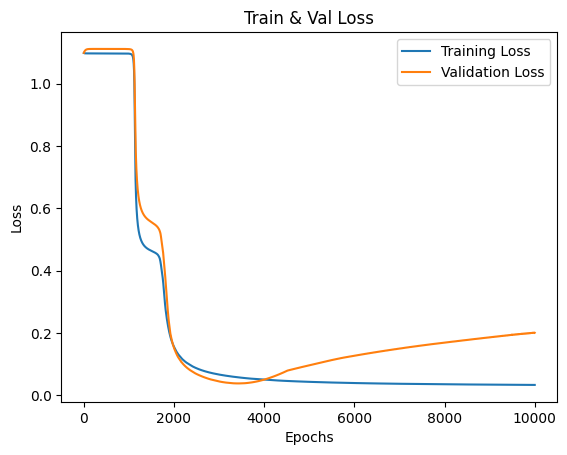

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss_history) + 1)
plt.plot(epochs, train_loss_history, label="Training Loss")
plt.plot(epochs, val_loss_history, label="Validation Loss")
plt.title("Train & Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

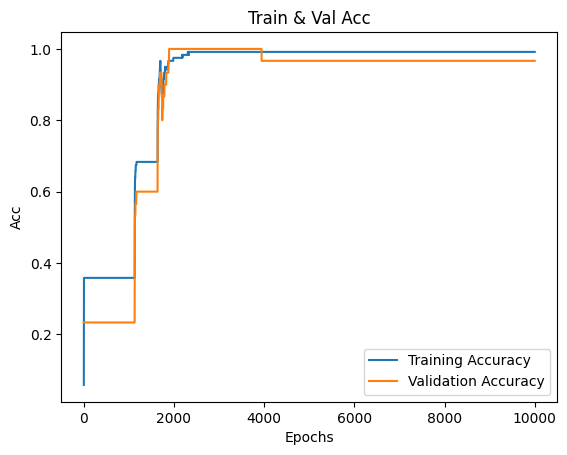

In [17]:
plt.plot(epochs, train_acc_history, label="Training Accuracy")
plt.plot(epochs, val_acc_history, label="Validation Accuracy")
plt.title("Train & Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()